In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# 데이터 불러오기 라이브러리
import pandas as pd
import numpy as np
import random as rnd

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/타이타닉/train(3).csv') # 모델 학습 데이터
test = pd.read_csv('/content/drive/MyDrive/타이타닉/test(3).csv') # 모델 테스트 데이터
submission = pd.read_csv('/content/drive/MyDrive/타이타닉/submission(3).csv')

# **1. 데이터 탐색적 분석 EDA**

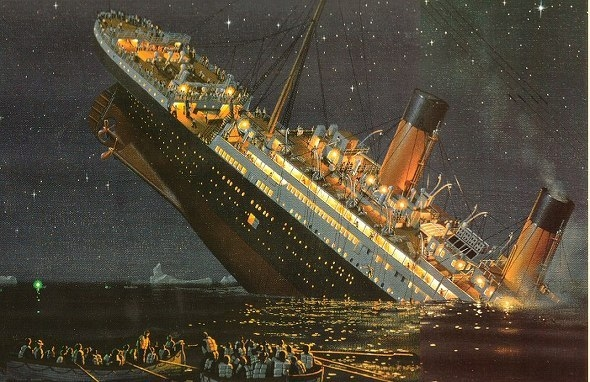



*   '**여성과 아이들 먼저**' 라는 탑승 규칙
*   충돌부위인 F 갑판부터 침수, 2등급 객실과 선원들의 숙소도 있었으나 **3등급 객실**이 대부분



In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)



*   Survived 항목 제외



In [ ]:
submission.shape

(418, 2)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **Data Dictionary**

**PassengerID**: 탑승객 고유 아이디

**Survival**: 탑승객 생존 유무 (0: 사망, 1: 생존) 

**Pclass**: 등실의 등급 (= 부의 정도)

**Name**: 이름

**Sex**: 성별

**Age**: 나이

**Sibsp**: 함께 탑승한 형제자매, 아내, 남편의 수

**Parch**: 함께 탑승한 부모, 자식의 수

**Ticket**: 티켓 번호

**Fare**: 티켓의 요금

**Cabin**: 객실 번호

**Embarked**: 배에 탑승한 항구 이름 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




*   수치형 데이터 - PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare


*   **수치화** 필요한 데이터 - Name, Sex, Ticket, Cabin, Embarked





In [ ]:
# 결측값 확인

train.isnull().sum() # 나이 177개, 객실번호 687개, 항구 이름 2개
test.isnull().sum() # 나이 86개, 객실번호 327개, 티켓 요금 1개

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# int, float 형 (숫자형) 데이터들 기술 통계량 확인
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




* Survived mean = 38.4 % 
*   Avg mean = 29 세
*   티켓 요금 mean = 32 파운드






In [ ]:
# object 형 데이터 통계치 확인
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644




*   남성 = 577명
*   Embarked (항구) S = 644명 



Text(0.5, 1.0, 'Survived')

Text(0, 0.5, '')

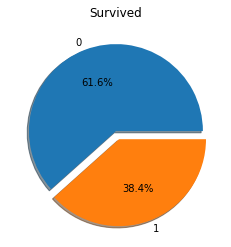

In [ ]:
# Survied, Dead 비율

ax = train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=[0, 0.1]);
ax.set_title('Survived')
ax.set_ylabel('')

plt.show()



*   61.6% 사망 
*   38.4% 생존
*   탑승객의 2/5 정도만 생존





Text(0.5, 1.0, 'Pclass')

Text(0, 0.5, '')

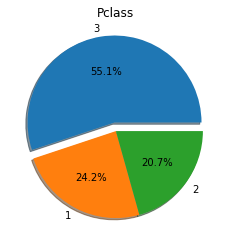

In [ ]:
# Pclass 파이 차트

ax = train['Pclass'].value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%',explode=[0.1, 0,0])
ax.set_title('Pclass')
ax.set_ylabel('')



*   객실 탑승객 수: **3등급** > 1등급 > 2등급



In [ ]:
# Pclass 와 Fare (티켓 요금) 간의 관계 파악

train[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550




*   객실 등급이 높아질수록 티켓 가격 비싸짐
*   객실 등급 높아질수록 **사회/경제적 지위** 높음 의미







,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


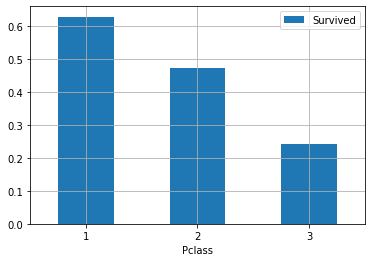

In [ ]:
# 객실 등급에 따른 생존율 확인

train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind = "bar",rot=0,grid = True)

3    491
1    216
2    184
Name: Pclass, dtype: int64

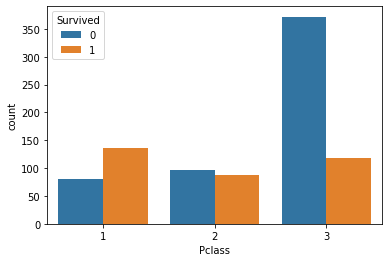

In [ ]:
train['Pclass'].value_counts()
sns.countplot(x='Pclass',hue='Survived',data=train)



*   **1등급** 객실 생존율 **62.9%** 생존 > 사망
*   2등급 객실 생존율 47.2% 생존 < 사망
*   3등급 객실 생존율 24.2% 생존 < 사망
*   3등급 객실 탑승객이 가장 많으나, 1등급 객실의 생존율이 가장 높음
*   즉, 사회적 지위가 높을수록 사망자 대비 생존자 비율이 높음을 추측해 볼 수 있음







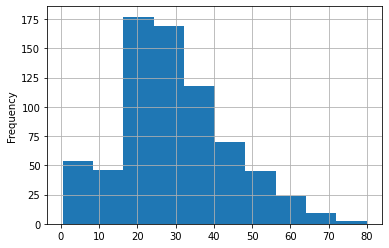

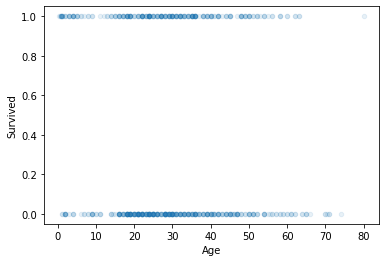

In [ ]:
# 탑승객 나이 확인

train['Age'].plot(kind = 'hist', bins = 10, grid = True)
train.plot('Age', 'Survived', kind = 'scatter', alpha = 0.1)



*   10대 후반 ~ 20대 초중반 탑승객이 가장 많음




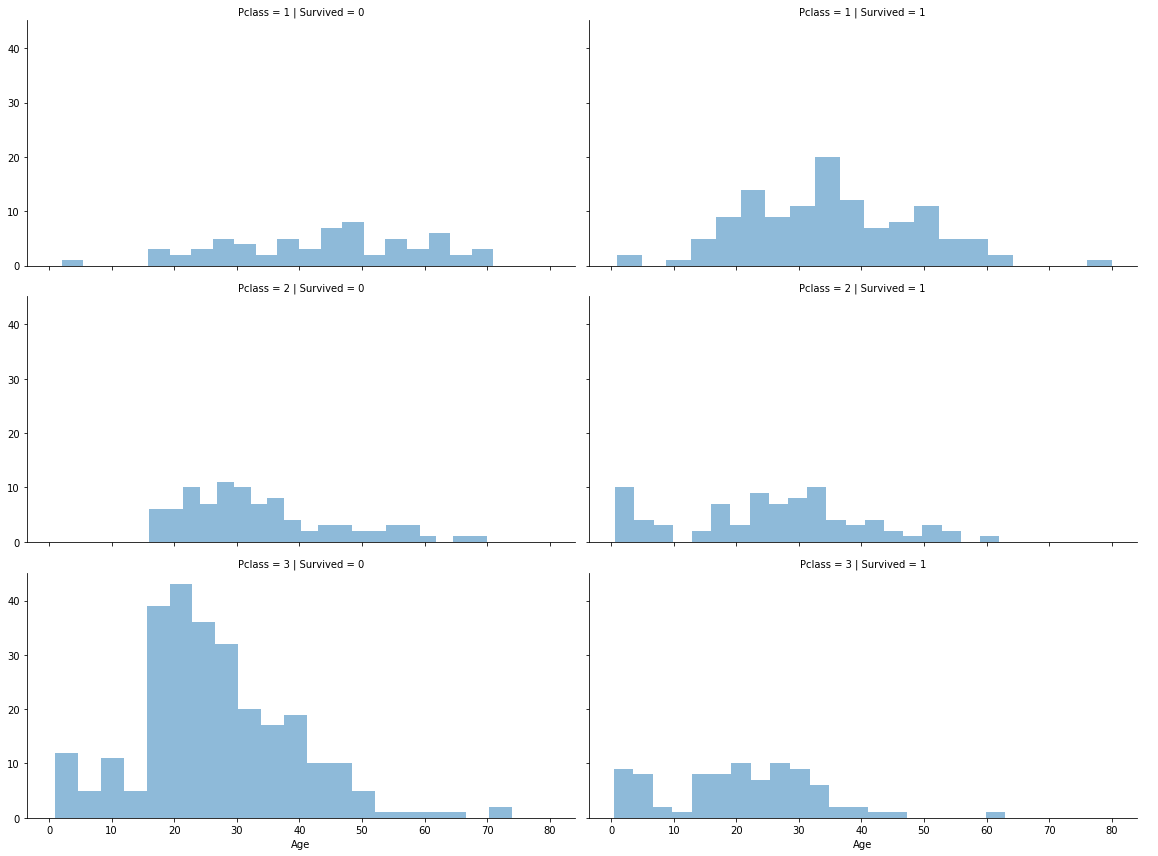

In [ ]:
# 객실 등급에 따른 연령별 생존율

ax = sns.FacetGrid(train, col='Survived', row = 'Pclass', height=4, aspect=2)
ax.map(plt.hist, 'Age', alpha=.5, bins=20)
ax.add_legend()
plt.show()



*   1등급 객실에서의 대부분의 연령대에서 생존율이 사망율에 비해 높음
*   객실 등급 높아질수록 생존율 역시 높아짐
*   특히, 2등급 객실에서 **유아 연령대**의 높은 생존율
*   3등급 객실에서는 **10대 후반~20대 초중반 연령대**의 높은 사망윹





,Sex,Survived
0,female,0.742038
1,male,0.188908


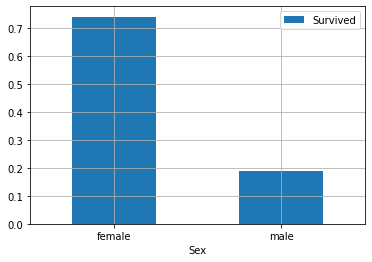

In [ ]:
# 성별 집단에 따른 생존율 확인

train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[['Sex', 'Survived']].groupby('Sex').mean().plot(kind = "bar",rot=0,grid = True)



*   여성 생존율 74.2 % 

*   남성 생존율 18.9 %
*   여성의 생존율이 남성의 생존율의 약 **4** 배
*   여성이 1 등급 객실에 많이 타고 있었는가?



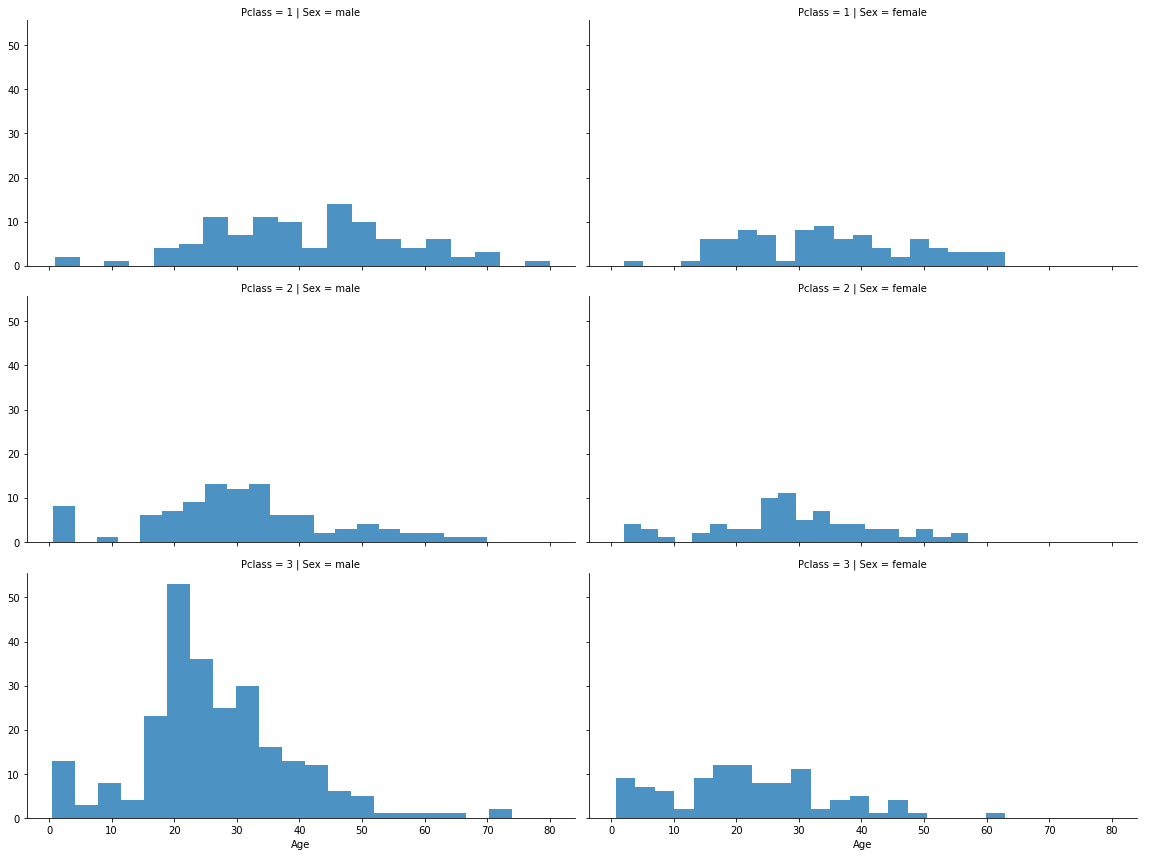

In [ ]:
# 객실 등급별 성별 분포 파악

ax = sns.FacetGrid(train, row='Pclass', col='Sex', height=4, aspect=2)
ax.map(plt.hist, 'Age', alpha=0.8, bins=20)
ax.add_legend()
plt.show()






*   1등급 객실에서의 여성 비율이 다른 등급 객실과 비교해 보았을때 많은 것은 아님


*   오히려 남자의 분포가 3등급 객실에서 높았음

*   **3등급 객실**에서, **20대 남성**이 두드러지게 많음



,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


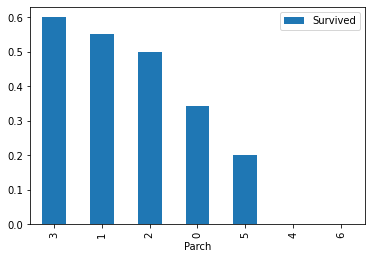

In [ ]:
# Parch 에 따른 생존율 파악

train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


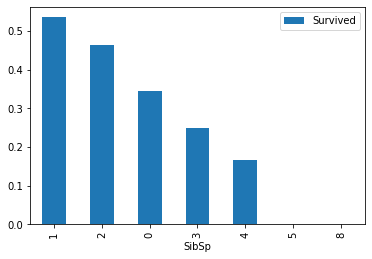

In [ ]:
# SibSp 에 따른 생존율 파악

train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()



*   혼자 탄 경우(0명)보다는 동승자 1명이라도 있는 경우 생존율 더 높은 것으로 보임
*   그렇다고 동승자가 너무 많으면 (5 이상) 생존율이 낮아짐
*   동승자 (Parch + SibSp) **3~4명** 정도 생존율 높음







S    644
C    168
Q     77
Name: Embarked, dtype: int64

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


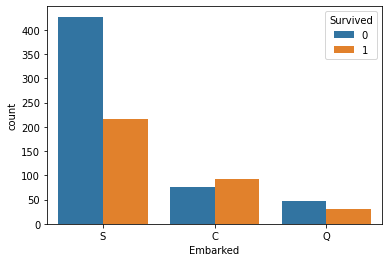

In [ ]:
# Embarked 에 따른 생존율 파악

train['Embarked'].value_counts()
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.countplot(x='Embarked', hue='Survived', data = train)




*   C 선착장에서의 생존율이 가장 높음
*   **S** 선착장의 경우 생존 < 사망
*   **C** 선착장의 경우 생존 > 사망
*   **Q** 선착장의 경우 생존 < 사망



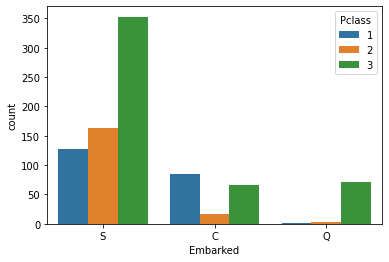

In [ ]:
# 객실 등급별 선착장 분포 확인

sns.countplot(x='Embarked', hue='Pclass', data = train)




*   C 선착장의 경우, 객실 등급 높은 승객이 많이 탔기 때문에 생존율 높음
*   S 선착장의 경우, 객실 등급 낮은 승객이 많이 탔기 때문에 사망율 높음



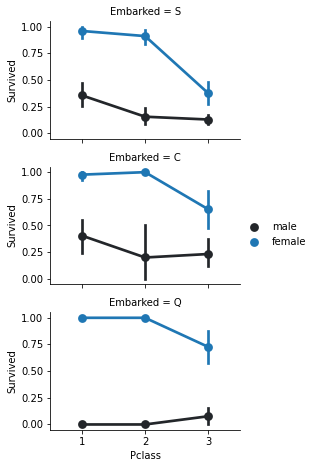

In [ ]:
# 성별에 따른 선착장 분포 확인

sur = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
sur.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = [1, 2, 3], hue_order = ["male", "female"])
sur.add_legend()

*   모든 선착장에서 여성의 생존율이 높음
*   선착장 C 와 Q 인 경우, 3 등급 남성 생존율 > 2 등급 남성 생존율

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

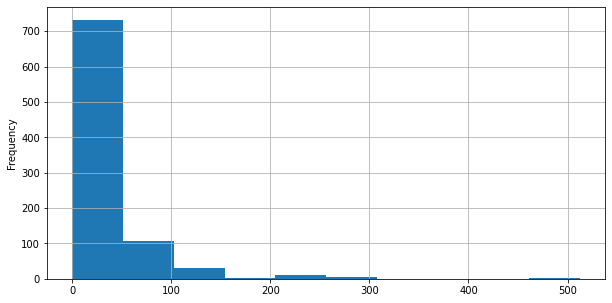

In [ ]:
# 티켓 가격 분포 

train['Fare'].plot(kind='hist',stacked=True,figsize=(10,5),rot=0,grid=True)
train['Fare'].describe()



*   0~50 사이 티켓이 가장 많고 가격이 높아질수록 티켓 수 적어짐
*   값싼 티켓은 3등급 객실 승객들이, 비싼 티켓은 1등급 객실 승객들이 구매했을 것임 (3등급 객실 승객들이 1, 2등급 객실 승객들보다 탑승객 수가 많기 때문에 값싼 티켓 수가 많은 것으로 추측 가능)
*   평균 티켓 가격 32





In [ ]:
# 티켓 번호
train.head(20)
train['Ticket'].value_counts()
train[train['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S




*   티켓 번호 영어 + 숫자 구성 or 숫자 구성
*   **첫번째 숫자가 객실 등급?** 대부분의 경우 그렇지만 1번 승객 (3등급, 티켓 숫자 2으로 시작), 11번 승객 (3등급, 티켓 숫자 9로 시작) 20번 승객 (3등급, 티켓 숫자 2로 시작) 예외 존재하기 때문에 함부로 단정 불가


*   가장 많이 존재하는 티켓 번호 **347082** - Andersson 가족이 같은 객실에 동승했다는 것 알 수 있음 


*   부모 - 14번, 611번 자식 - 120번, 542번, 543번, 814번, 851번 으로 추측 가능









# **Summary**

*   '아이와 여성을 먼저 살리자'
*   성별이 **여성**일수록, 객실 **등급**이 높을수록 생존율이 높음

*   **유아** 연령대의 생존율이 높음

*   **Cherbourg** 선착장에서 탑승한 승객 생존율 높음
*   동승자가 **적당히** 있다면 생존율 높음





# **2. Feature Engineering**

적절한 모델 학습 피처 선택 - Name, Sex, Age, Pclass, Embarked, SibSp, Pearch, Cabin

(Ticket - 생존율과 유의미한 관계를 보이지 않기 때문에 피처에서 제외)

In [ ]:
# 시각화 위한 bar_chart 함수 선언

def bar_chart(feature):
  s = train[train['Survived']==1][feature].value_counts()
  d = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([s,d])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True,figsize=(10,5),rot=0,grid=True)

**2.1 Name** - Title 만 빼내고 이름 삭제

**Title 이란?** 승객 성별, 결혼 유무, 연령대 알 수 있는 정보로 활용 가능

In [ ]:
# title 데이터열 생성

for t in [train]:
  t['Title'] = t['Name'].str.extract(' ([A-Za-z]+)\.') # Title 빼내는 정규표현식
for t in [test]:
  t['Title'] = t['Name'].str.extract(' ([A-Za-z]+)\.')
test.tail(5)


NameError: ignored

In [ ]:
train['Title'].value_counts()

In [ ]:
# 수치화: Mr: 0 Miss:1 Mrs: 2 Others: 3

t_mapping = {"Mr":0, "Miss":1,  "Mrs":2, "Master":3, "Dr":3, 
             "Rev":3, "Mlle":3, "Major":3, "Col":3, "Countess":3,  
             "Capt":3,  "Ms":3,  "Sir":3,  "Lady":3, "Mme":3, "Don":3, "Dona":3,"Jonkheer":3}  
train['Title'] = train['Title'].map({"Mr":0, "Miss":1,  "Mrs":2, "Master":3, "Dr":3, 
             "Rev":3, "Mlle":3, "Major":3, "Col":3, "Countess":3,  
             "Capt":3,  "Ms":3,  "Sir":3,  "Lady":3, "Mme":3, "Don":3, "Dona":3, "Jonkheer":3} )
test['Title'] = test['Title'].map({"Mr":0, "Miss":1,  "Mrs":2, "Master":3, "Dr":3, 
             "Rev":3, "Mlle":3, "Major":3, "Col":3, "Countess":3,  
             "Capt":3,  "Ms":3,  "Sir":3,  "Lady":3, "Mme":3, "Don":3, "Dona":3, "Jonkheer":3} )
train.head(5)
test.head(5)

In [ ]:
bar_chart('Title')

Mr: 0

Miss:1

Mrs: 2

other: 3

* Mr, 즉 남성은 생존율에 비해 사망율이 높음
* Miss/ Mrs, 즉 여성은 사망율에 비해 생존율이 높음



In [ ]:
# Name 데이터 삭제

train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [ ]:
# PassengerId 데이터 삭제

test.drop('PassengerId',axis=1,inplace=True)
train.drop('PassengerId',axis=1,inplace=True)

**2.2 Sex**

male: 0 female: 1

In [ ]:
sex_mapping = {"male":0,"female":1}
train['Sex'] = train['Sex'].map({'male':0,'female':1})
test['Sex'] = test['Sex'].map({'male':0,'female':1})
train.head(5)
test.head(5)

In [ ]:
bar_chart("Sex")



*   Title 항목에서 동일하게 남성은 사망율이 높고 여성은 생존율이 높음


**2.3 Age**

*   결측치 존재 - train 177개 test 86개
*   평균 나이로 결측치 채움




In [ ]:
np.mean(train['Age']) # 30살

train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(train['Age'].mean(), inplace=True)

In [ ]:
test.info()
train.info()



*   연속형 수치를 나이별 범주로 분류
*   나이에 따른 생존율 파악 용이 위해 
*   **Child, Teenager, Young Adult, Mid Adult, Senior**






In [ ]:
def get_age(age):
  num = 0
  if age<=12: num = 0 # Child
  elif age<=25: num = 1 # teenager
  elif age<=35: num = 2 # Young adult
  elif age<=60: num = 3 # mid adult
  else: num = 4 # senior
  return num

train['Age']=train['Age'].apply(lambda x : get_age(x)) # 범주화 숫자 저장
train.head(5)

In [ ]:
test['Age']=test['Age'].apply(lambda x : get_age(x))

Child: 0

teenager: 1

Young adult: 2

mid adult: 3

senior: 4

In [ ]:
sns.countplot(x='Age', hue='Survived', data = train)



*  **Child 생존 > 사망**

*   Teenage, Young Adult 생존 < 사망
*   Mid Adult 생존 < 사망

*   Senior 생존 < 사망




**2.4 Embarked**

*   결측치 존재 - train 2개




In [ ]:
p1 = train[train['Pclass']==1]['Embarked'].value_counts()
p2 = train[train['Pclass']==2]['Embarked'].value_counts()
p3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([p1,p2,p3])
df.index = ['1','2','3']
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)



*   1, 2등급 손님들은 Q 선박장에서 거의 타지 않음
*   대부분의 승객들이 S 선박장에서 많이 탐
*   **결측치 S 로 채워줘도 무방할 것이라 추측**





In [ ]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

In [ ]:
# "S":0,"C":1,"Q":2

train['Embarked'] = train['Embarked'].map({"S":0,"C":1,"Q":2})
test['Embarked'] = test['Embarked'].map({"S":0,"C":1,"Q":2})
train.head(5)

**2.5 Fare (티켓 가격)**

*   결측치 존재 - test 1개
*   가격 그룹으로 나누어 범주화




In [ ]:
train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean() # 등급별 티켓 가격 평균
test[test["Fare"].isnull()]["Pclass"] # 결측값: 3 등급 승객

In [ ]:
test['Fare'].fillna(13.675, inplace=True) # 3 등극 승객이므로 3 등급 객실의 티켓 평균으로 결측치 채워 줌

In [ ]:
train['Fare'].plot(kind='hist',figsize=(10,5),rot=0,grid=True)
train['Fare'].value_counts()
train['Fare'].describe()

In [ ]:
# 수치화

def get_fare(fare):
  num = 0
  if fare<=17: num = 0 # 저렴한 티켓
  elif fare<=30: num = 1 
  elif fare<=100: num = 2 
  else: num = 3 # 비싼 티켓
  return num

train['Fare']=train['Fare'].apply(lambda x : get_fare(x)) # 범주화 숫자 저장
test['Fare']=test['Fare'].apply(lambda x : get_fare(x)) # 범주화 숫자 저장
train.head(5)

In [ ]:
sns.countplot(x='Fare', hue='Survived', data = train)



* 티켓값 **비싸질수록** 사망율 대비 생존율이 높아짐



**2.6 Cabin (객실 이름)**

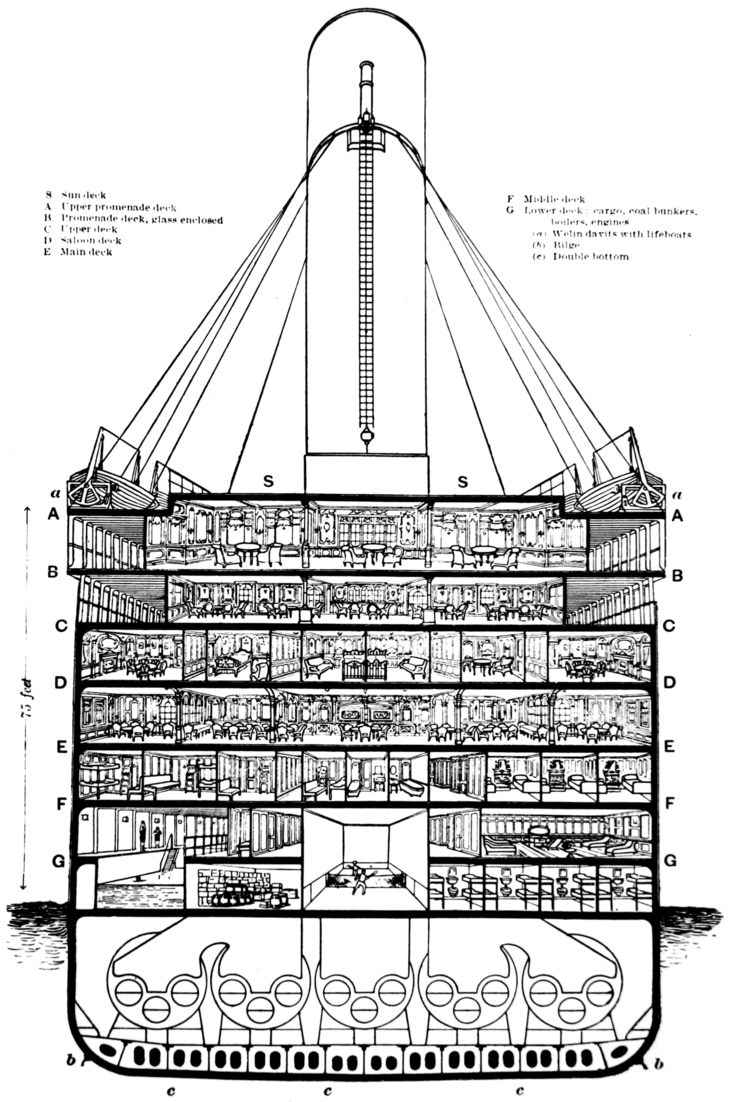


*  객실이 갑판 위치에 따라 알파벳으로 구분되어 있음, 객실 이름의 **맨 앞 알파벳**만 추출하여 사용


*   결측치 존재 - train 687개, test 327개




In [ ]:
train.Cabin.value_counts()
train['Cabin'] = train['Cabin'].str[:1] # 알파벳만 추출

In [ ]:
p1 = train[train['Pclass']==1]['Cabin'].value_counts()
p3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([p1,p2,p3])
df.index = ['class1','class2','class3']
df.plot(kind='bar',stacked=False,figsize=(10,5),rot=0)




*   1등급 객실: C > B > D 차례대로 객실 번호 많음
*   2, 3등급 객실에는 C, B 객실 번호 존재하지 않음
*   또한 1등급 객실에는 A 객실 번호가 존재하나 2, 3 등급 객실에는 존재하지 않음 -> **A, B, C 객실은 1등급 승객 전용?**






In [ ]:
# 수치화
# Feature Scaling: 서로 다른 변수의 값 범위를 일정 수준으로 맞추는 작업
# 특성의 스케일은 알고리즘에 영향을 줌
# 모든 변수들이 예측에 비슷한 기여할 기여할 수 있도록
# 즉, 머신 러닝 모델이 특정 데이터의 편향성 갖는 것 방지
# 다른 데이터들은 0~3 사이기 때문에 해당 데이터에서도 범위가 3이 넘지 않도록 수치화
# 간격 0.4 로 설정 (0.3 or 0.5 모두 실행해 본 결과, 큰 차이는 없었으나 0.4에서 가장 정확도가 높았음)

def get_c(c):
  num = 0
  if c=='A': num = 0 
  elif c=='B': num = 0.4
  elif c=='C': num = 0.8
  elif c=='D': num = 1.2
  elif c=='E': num = 1.6
  elif c=='F': num = 2.0
  elif c=='G': num = 2.4
  else: num = 2.8
  return num

train['Cabin']=train['Cabin'].apply(lambda x : get_c(x)) # 범주화 숫자 저장
test['Cabin']=test['Cabin'].apply(lambda x : get_c(x)) # 범주화 숫자 저장
train.head(5)

In [ ]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('mean'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('mean'),inplace=True)

# 각 객실 등급별 평균값을 결측치로 채워 줌

**2.7 Sibsp**

In [ ]:
bar_chart('SibSp')



*   혼자 탄 경우 (동승자 0명) 죽을 확률 > 생존 확률
*   동승자가 적당히 있는 경우 생존 확률이 죽을 확률보다 큰 경향을 보임



In [ ]:
# 수치화 (간격 0,4)

def get_s(s):
  num = 0
  if s==1: num = 0 
  elif s==2: num = 0.4
  elif s==3: num = 0.8
  elif s==4: num = 1.2
  elif s==5: num = 1.6
  elif s==6: num = 2.0
  elif s==7: num = 2.4
  elif s==8: num = 2.8
  elif s==9: num = 3.2
  elif s==10: num = 3.6
  else: num = 4.0
  return num

train['SibSp']=train['SibSp'].apply(lambda x : get_s(x)) # 범주화 숫자 저장
test['SibSp']=test['SibSp'].apply(lambda x : get_s(x)) # 범주화 숫자 저장
train.head(5)

**2.8 Parch**

In [ ]:
bar_chart('Parch')



*   혼자 탄 경우 (동승자 0명) 죽을 확률 > 생존 확률
*   동승자가 적당히 (3~4명) 있는 경우 생존 확률이 죽을 확률보다 큰 경향을 보임



In [ ]:
def get_p(p):
  num = 0
  if p==1: num = 0 
  elif p==2: num = 0.4
  elif p==3: num = 0.8
  elif p==4: num = 1.2
  elif p==5: num = 1.6
  elif p==6: num = 2.0
  elif p==7: num = 2.4
  elif p==8: num = 2.8
  elif p==9: num = 3.2
  elif p==10: num = 3.6
  else: num = 4.0
  return num

train['Parch']=train['Parch'].apply(lambda x : get_p(x)) # 범주화 숫자 저장
test['Parch']=test['Parch'].apply(lambda x : get_p(x)) # 범주화 숫자 저장
train.head(5) 

**2.9 WithFamily 데이터 생성**



*   SibSp 항목, Parch 항목을 **WithFamily** 로 차원축소
*   실험 결과, 개별 데이터로 구성하는 것보다 WithFamily 로 차원축소한 모델 정확도 높게 나옴




In [ ]:
train['WithFamily'] = np.where(train['Parch']+train['SibSp']!=0,1,0)
test['WithFamily'] = np.where(test['Parch']+test['SibSp']!=0,1,0)

In [ ]:
train[['WithFamily','Survived']].groupby(['WithFamily'],as_index=False).mean()




*   WithFamily 변수 추가: 동승자 있는 경우 1, 동승자 없는 경우 0

*   가족 동반한 경우 생존율 > 동반하지 않은 경우 생존율





In [ ]:
train.drop(['Parch','SibSp'],axis=1,inplace=True)
test.drop(['Parch','SibSp'],axis=1,inplace=True)

In [ ]:
train.head()
test.head()

In [ ]:
# 필요없는 열 정리 - Ticket 번호

train = train.drop('Ticket',axis=1)
test = test.drop('Ticket',axis=1)

In [ ]:
# 수치화 완료

train.head(5)
test.head(5)

In [ ]:
correlation_matrix = train.corr().round(1)
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.show()



*   taget 변수인 Survived 와 **성별**, **티켓 요금**, **Title** 항목과의 연관성이 비교적 높음



# **3. Modeling & Validation**

In [ ]:
# 모델 개발 라이브러리

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int64  
 4   Fare        891 non-null    int64  
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   WithFamily  891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


In [ ]:
train_data = train
train_data = train_data.drop('Survived',axis=1) # 타깃 변수 drop
train_data # 훈련 데이터 생성 완료
train_target = train['Survived']

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,WithFamily
0,3,0,1,0,2.8,0,0,1
1,1,1,3,2,0.8,1,2,1
2,3,1,2,0,2.8,0,1,1
3,1,1,2,2,0.8,0,2,1
4,3,0,2,0,2.8,0,0,1
...,...,...,...,...,...,...,...,...
886,2,0,2,0,2.8,0,3,1
887,1,1,1,1,0.4,0,1,1
888,3,1,2,1,2.8,0,1,1
889,1,0,2,1,0.8,1,0,1


# **K fold cross validation**
 K 개의 검증 세트로 K 번 성능 평가한 후 계산된 선능 

*   K 개의 검증 세트로 K 번 성능 평가한 후 계산된 선능 평균을 내어 최종 성능 개선
*   **10** 개의 fold 로 나눔

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10,shuffle=True,random_state=0) # Kfold 검증 활용

### **3.1 KNN (이웃 알고리즘)**


*   K개의 가장 가까운 훈련 데이터 참조하여 분류



In [ ]:
model = KNeighborsClassifier(n_neighbors=15)
score = cross_val_score(model, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
score

array([0.84444444, 0.76404494, 0.78651685, 0.80898876, 0.80898876,
       0.82022472, 0.76404494, 0.79775281, 0.78651685, 0.78651685])

In [ ]:
round(np.mean(score)*100,2)

79.68

### **3.2 Decision Tree (의사 결정 나무)**

*   타깃변수 맞추기 위해 나무 쪼개나가는 알고리즘
*   나무 = train 데이터의 특성들
*   구별하기 가장 좋은 질문부터 (여자인가 남자인가? 동승자가 있는가 없는가?)





In [ ]:
model = DecisionTreeClassifier()
score = cross_val_score(model, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
score

array([0.78888889, 0.86516854, 0.76404494, 0.80898876, 0.86516854,
       0.76404494, 0.79775281, 0.84269663, 0.74157303, 0.82022472])

In [ ]:
round(np.mean(score)*100,2)

80.59

### **3.3 Random Forest (여러 개의 Decision Tree 사용)**


*   decision tree 과적합 되었을 경우 솔루션으로 사용
*   질문이 랜덤으로 주어짐



In [ ]:
model = RandomForestClassifier(n_estimators=15)
score = cross_val_score(model, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
score

array([0.75555556, 0.84269663, 0.7752809 , 0.79775281, 0.86516854,
       0.80898876, 0.7752809 , 0.80898876, 0.75280899, 0.84269663])

In [ ]:
round(np.mean(score)*100,2)

80.25

## **3.4 LogisticRegression**



*   선형 데이터 분류 문제 해결 모델
*   0~1 사이의 확률값 반환



In [ ]:
model = LogisticRegression()
model.fit(train_data, train_target)
score = cross_val_score(model, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
score

LogisticRegression()

array([0.83333333, 0.76404494, 0.79775281, 0.79775281, 0.76404494,
       0.80898876, 0.80898876, 0.80898876, 0.82022472, 0.84269663])

In [ ]:
round(np.mean(score)*100,2)

80.47

### **3.5 SVM (Support Vector Machine)**



*   비선형 데이터 분류 문제 해결 모델

*   분류시 decision boundary 와 가까이 있는 서포트 벡터만 고려하여 계산양 줄일 수 있음



In [ ]:
model = SVC()
score = cross_val_score(model, train_data,train_target,cv=k_fold, n_jobs=1,scoring='accuracy')
score

array([0.84444444, 0.80898876, 0.83146067, 0.79775281, 0.78651685,
       0.83146067, 0.83146067, 0.85393258, 0.82022472, 0.84269663])

In [ ]:
round(np.mean(score)*100,2)

82.49

**score 순서**


*   **SVM (82.49**) > Random Forest (81.14) > LogisticRegression (80.47) > Decision Tree (80.36) >  KNN (79.68)
*   SVM 채택

# **4. Application**

In [ ]:
model = SVC()
model.fit(train_data,train_target)
test_data = test
surv = model.predict(test_data) # 생존/사망 예측
surv

SVC()

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/타이타닉/submission(3).csv')
survive = submission.copy() 
survive['Survived'] = surv
survive.to_csv('submission(1).csv',index=False) # 제출 파일 저장

# **5. 데이콘 참여 결과**

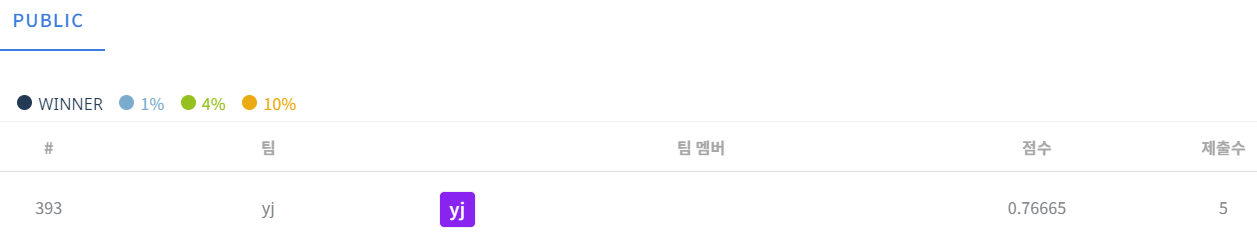



*   점수 0.76
*   **SVM** 모델이 점수가 가장 높게 나온 이유? 선형회귀 알고리즘 점수가 인데 비해 SVC 모델 점수가 높은 이유는 해당 데이터들이 **비선형**의 형태를 보이고 있기 때문이라 추측

*   Decision Tree 모델보다 **SVM 모델** 점수가 높은 이유? 너무 많은 노드와 가지들이 존재해서 과적합이 일어났을 가능성이 높음




